In [ ]:
# Matteo's version of the plotting
reload(do)
dt=1e-2
import matplotlib.animation as animation
fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 1000)
line, = ax.plot(system.grid, do.eval_one_body_density(system, nparticles, C0).real)
integrator = scipy.integrate.ode(rhs.f).set_integrator('zvode')
integrator.set_initial_value( np.reshape(C0, len(C0)**2 ), 0)
ani = animation.FuncAnimation(fig, do.animation, fargs=(line, system, dt, t_max, C0, omega, epsilon0, nparticles, integrator), interval=200, blit=True, save_count=1000)
from IPython.display import HTML
HTML(ani.to_jshtml())

In [ ]:
%reset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg, scipy.integrate
import do2
from importlib import reload
from IPython.display import display, clear_output
from quantum_systems import ODQD, GeneralOrbitalSystem
%load_ext autoreload
%autoreload 2

In [2]:
### PARAMETERS ###
l = 10 # Number of eigenstates of the HO potential --> we use these functions to generate the single particle WF
grid_length = 10  # The width of the one-dimensional grid
num_grid_points = 201  # The number of discretized points on the grid.
# More points give better results for the single-particle basis at the cost of slower setup.
alpha = 1  # The strength of the Coulomb interaction 
a = 0.25  # The shielding parameter in the Coulomb interaction potential
Omega = 0.25  # The frequency of the harmonic oscillator trap
omega = 8*Omega # frequency of the laser field
epsilon0 = 1.0 # amplitude of the laser field
potential=ODQD.HOPotential(Omega)
nparticles = 2

progress = 100.00C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


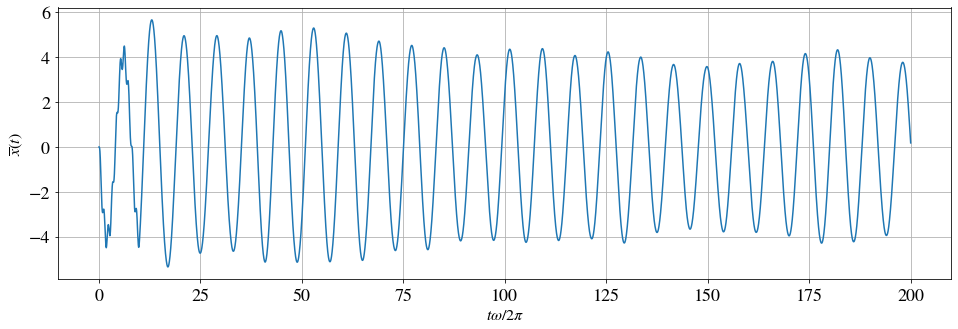

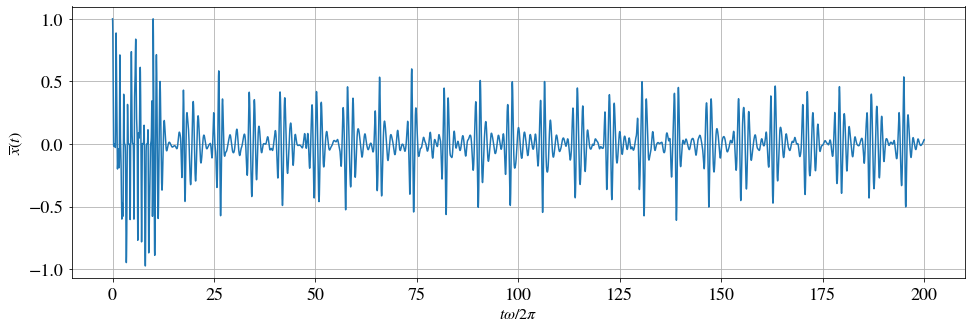

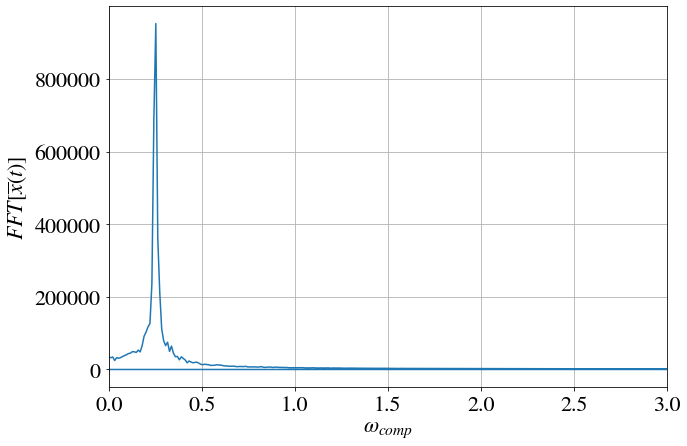

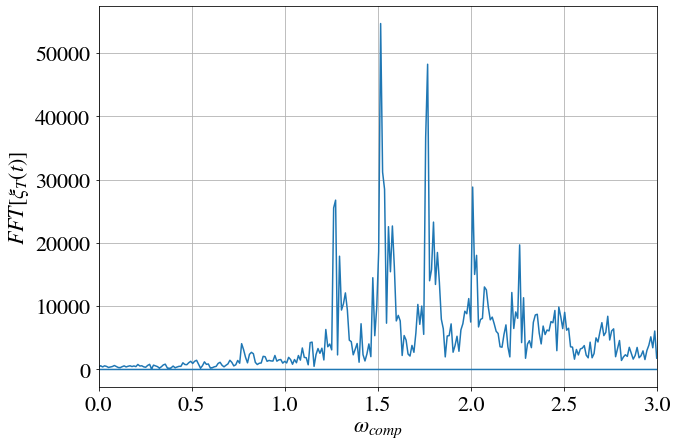

In [44]:
Omega = 0.25
omega = 2.0
T = 2*np.pi / omega
ghf = do2.GHF()
C, time1, dipole1, overlap1, xFFT1, xfreqFFT1, overlapFFT1, overlapfreqFFT1 = ghf.fourier_analysis(tolerance=1e-6, max_iter=100, t_laser_ON=10*T, t_max=200*T, dt=1e-3, plot_dipole=True, plot_overlap=True, plot_fft_x=True, plot_fft_overlap=True)

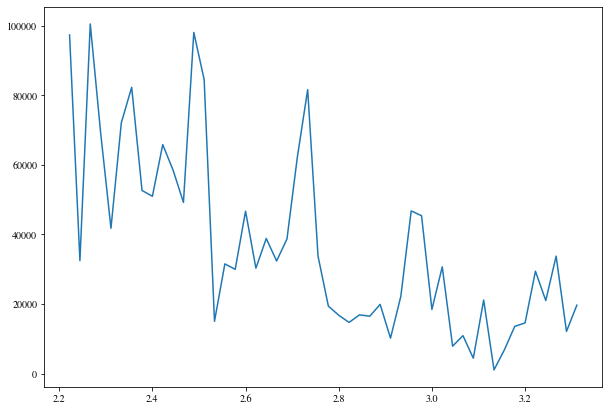

In [43]:
pr1 = 100
pr2 = 150
plt.figure(figsize=(10,7))
plt.plot(2*np.pi*overlapfreqFFT1[pr1:pr2], np.abs(overlapFFT1[pr1:pr2]))

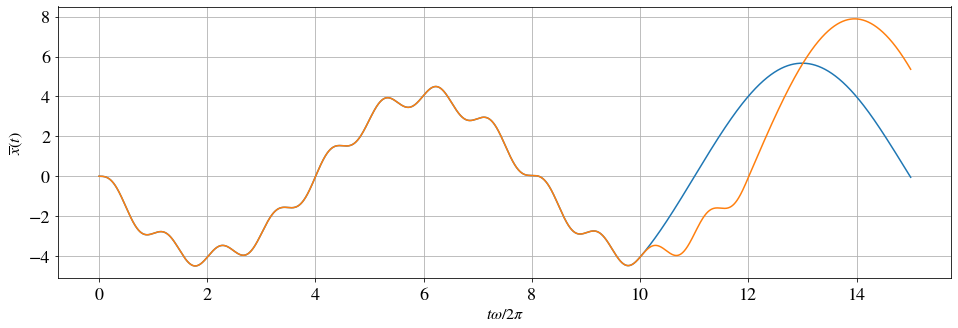

In [52]:
plt.figure(figsize=(16,5))
plt.plot(time1*omega*0.5/np.pi, dipole1.real, label=r'$T=10\times2\pi/\omega$')
plt.plot(time2*omega*0.5/np.pi, dipole2.real, label=r'$T=12\times2\pi/\omega$')
plt.xlabel(r'$t\omega/2\pi$', fontsize=16)
plt.ylabel(r'$\overline{x}(t)$', fontsize=16)
ax = plt.gca()
ax.tick_params(axis='both', which='major', pad=5, labelsize=18)
plt.grid()
#plt.savefig('../paper/images/laser_on_off.pdf', bbox_inches='tight')
plt.show()